# Data Wrangling
## Análisis de Calidad de Datos
Equipo: Comando Estelar

#### Instalación de paquetes necesarios

In [16]:
%pip install Pandas


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install ydata_profiling

Note: you may need to restart the kernel to use updated packages.


In [25]:
%pip install  dython

Note: you may need to restart the kernel to use updated packages.


#### Importación de las librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from ydata_profiling import ProfileReport
from dython.nominal import associations

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importación de archivos

In [3]:
df = pd.read_csv('iar_Reservaciones.csv')


/var/folders/by/zjps0pld1k3grf79nwzwkw440000gn/T/ipykernel_4297/2627998811.py:1: DtypeWarning: Columns (22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('iar_Reservaciones.csv')


In [4]:
df.head()

,ID_Reserva,Fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,...,h_edo,h_codigop,h_correo_e,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve,h_ult_cam_fec,h_ult_cam_fec_ok,h_ult_cam_fec_okt
0,0,2019-08-16,20190816,2019-08-16,2019-08-16,2,0,2,0,0,...,EMX,01500,NaN,NaN,2659.98,0.0,1,20191110,2019-11-10,2019-11-10
1,1,2019-10-22,20191022,2019-10-22,2019-10-22,4,0,4,0,0,...,EGT,023541,NaN,NaN,1764.00,0.0,1,20191205,2019-12-05,2019-12-05
2,2,2019-10-28,20191028,2019-10-28,2019-10-28,2,0,2,0,0,...,EMC,59800,NaN,NaN,2660.04,0.0,1,20191205,2019-12-05,2019-12-05
3,3,2019-10-28,20191028,2019-10-28,2019-10-28,4,0,3,0,0,...,EGT,37219,NaN,NaN,1995.03,0.0,1,20191211,2019-12-11,2019-12-11
4,4,2019-10-28,20191028,2019-10-28,2019-10-28,2,0,2,0,0,...,EMX,15300,NaN,NaN,13369.92,0.0,1,20191212,2019-12-12,2019-12-12


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203002 entries, 0 to 203001
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID_Reserva                203002 non-null  int64  
 1   Fecha_hoy                 203002 non-null  object 
 2   h_res_fec                 203002 non-null  int64  
 3   h_res_fec_ok              203002 non-null  object 
 4   h_res_fec_okt             203002 non-null  object 
 5   h_num_per                 203002 non-null  int64  
 6   aa_h_num_per              203002 non-null  int64  
 7   h_num_adu                 203002 non-null  int64  
 8   aa_h_num_adu              203002 non-null  int64  
 9   h_num_men                 203002 non-null  int64  
 10  aa_h_num_men              203002 non-null  int64  
 11  h_num_noc                 203002 non-null  int64  
 12  aa_h_num_noc              203002 non-null  int64  
 13  h_tot_hab                 203002 non-null  i

In [11]:
df.describe()

,ID_Reserva,h_res_fec,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,aa_h_num_men,h_num_noc,aa_h_num_noc,...,Cliente_Disp,aa_Cliente_Disp,Reservacion,aa_Reservacion,ID_estatus_reservaciones,h_correo_e,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve
count,203002.00000,2.030020e+05,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,...,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,0.0,0.0,2.030020e+05,2.030020e+05,203002.0
mean,101500.50000,2.019291e+07,1.185865,1.170550,1.094708,1.079694,0.034108,0.033734,1.680028,1.656043,...,1.094708,1.079694,0.503438,0.496562,6.733407,NaN,NaN,4.106728e+03,4.039369e+03,1.0
std,58601.77401,4.109583e+03,1.369629,1.368073,1.207076,1.204694,0.265187,0.264043,2.866189,2.847958,...,1.207076,1.204694,0.499989,0.499989,3.193774,NaN,NaN,6.501707e+03,6.443027e+03,0.0
min,0.00000,2.019010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,-3.091000e+04,-3.091000e+04,1.0
25%,50750.25000,2.019041e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,NaN,NaN,0.000000e+00,0.000000e+00,1.0
50%,101500.50000,2.019072e+07,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,9.000000,NaN,NaN,0.000000e+00,0.000000e+00,1.0
75%,152250.75000,2.019123e+07,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,3.000000,3.000000,...,2.000000,2.000000,1.000000,1.000000,9.000000,NaN,NaN,7.592000e+03,7.494000e+03,1.0
max,203001.00000,2.020043e+07,32.000000,32.000000,15.000000,15.000000,15.000000,15.000000,687.000000,687.000000,...,15.000000,15.000000,1.000000,1.000000,9.000000,NaN,NaN,1.033056e+06,1.033056e+06,1.0


In [12]:
df.shape

(203002, 49)

## Pandas Data Profiling
Aplicamos esta herramienta de Pandas antes de realizar el análisis

In [ ]:
profile_report = ProfileReport(df, title="Profiling Report")
profile_report.to_file("Profile_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]


# `Identificación de Variables`

## Validadción de Datos `Tipos de Datos`

In [5]:
df.dtypes

ID_Reserva                    int64
Fecha_hoy                    object
h_res_fec                     int64
h_res_fec_ok                 object
h_res_fec_okt                object
h_num_per                     int64
aa_h_num_per                  int64
h_num_adu                     int64
aa_h_num_adu                  int64
h_num_men                     int64
aa_h_num_men                  int64
h_num_noc                     int64
aa_h_num_noc                  int64
h_tot_hab                     int64
aa_h_tot_hab                  int64
ID_Programa                   int64
ID_Paquete                    int64
ID_Segmento_Comp              int64
ID_Agencia                    int64
ID_empresa                    int64
ID_Tipo_Habitacion            int64
ID_canal                      int64
h_fec_lld                    object
h_fec_lld_ok                 object
h_fec_lld_okt                object
h_fec_reg                    object
h_fec_reg_ok                 object
h_fec_reg_okt               

### Correción de tipos de datos
Convertimos a tipo de dato fecha todas las columnas en las que corresponda, haciendo distinción dependiendo de su formato

In [6]:
columnas_fechas = ['Fecha_hoy', 'h_fec_reg_ok', 'h_fec_reg_okt', 'h_res_fec_ok', 'h_res_fec_okt', 'h_fec_lld_ok', 'h_fec_lld_okt', 'h_ult_cam_fec_ok', 'h_ult_cam_fec_okt', 'h_fec_sda_ok', 'h_fec_sda_okt']
columnas_fechas_sin_guion = ['h_fec_reg', 'h_fec_lld', 'h_res_fec','h_ult_cam_fec', 'h_fec_sda', ]

for fecha in columnas_fechas:
    df[fecha] = pd.to_datetime(df[fecha], errors='coerce')

for fecha in columnas_fechas_sin_guion:
    df[fecha] = pd.to_datetime(df[fecha], format='%Y%m%d', errors='coerce')

# `Análisis Univariado`

## Valores Continuos - Distribución de Frecuencias - `Centralidad, Rango y Simetría`

array([[<Axes: title={'center': 'ID_Reserva'}>,
        <Axes: title={'center': 'Fecha_hoy'}>,
        <Axes: title={'center': 'h_res_fec'}>],
       [<Axes: title={'center': 'h_res_fec_ok'}>,
        <Axes: title={'center': 'h_res_fec_okt'}>,
        <Axes: title={'center': 'h_num_per'}>],
       [<Axes: title={'center': 'aa_h_num_per'}>,
        <Axes: title={'center': 'h_num_adu'}>,
        <Axes: title={'center': 'aa_h_num_adu'}>],
       [<Axes: title={'center': 'h_num_men'}>,
        <Axes: title={'center': 'aa_h_num_men'}>,
        <Axes: title={'center': 'h_num_noc'}>],
       [<Axes: title={'center': 'aa_h_num_noc'}>,
        <Axes: title={'center': 'h_tot_hab'}>,
        <Axes: title={'center': 'aa_h_tot_hab'}>],
       [<Axes: title={'center': 'ID_Programa'}>,
        <Axes: title={'center': 'ID_Paquete'}>,
        <Axes: title={'center': 'ID_Segmento_Comp'}>],
       [<Axes: title={'center': 'ID_Agencia'}>,
        <Axes: title={'center': 'ID_empresa'}>,
        <Axes: titl

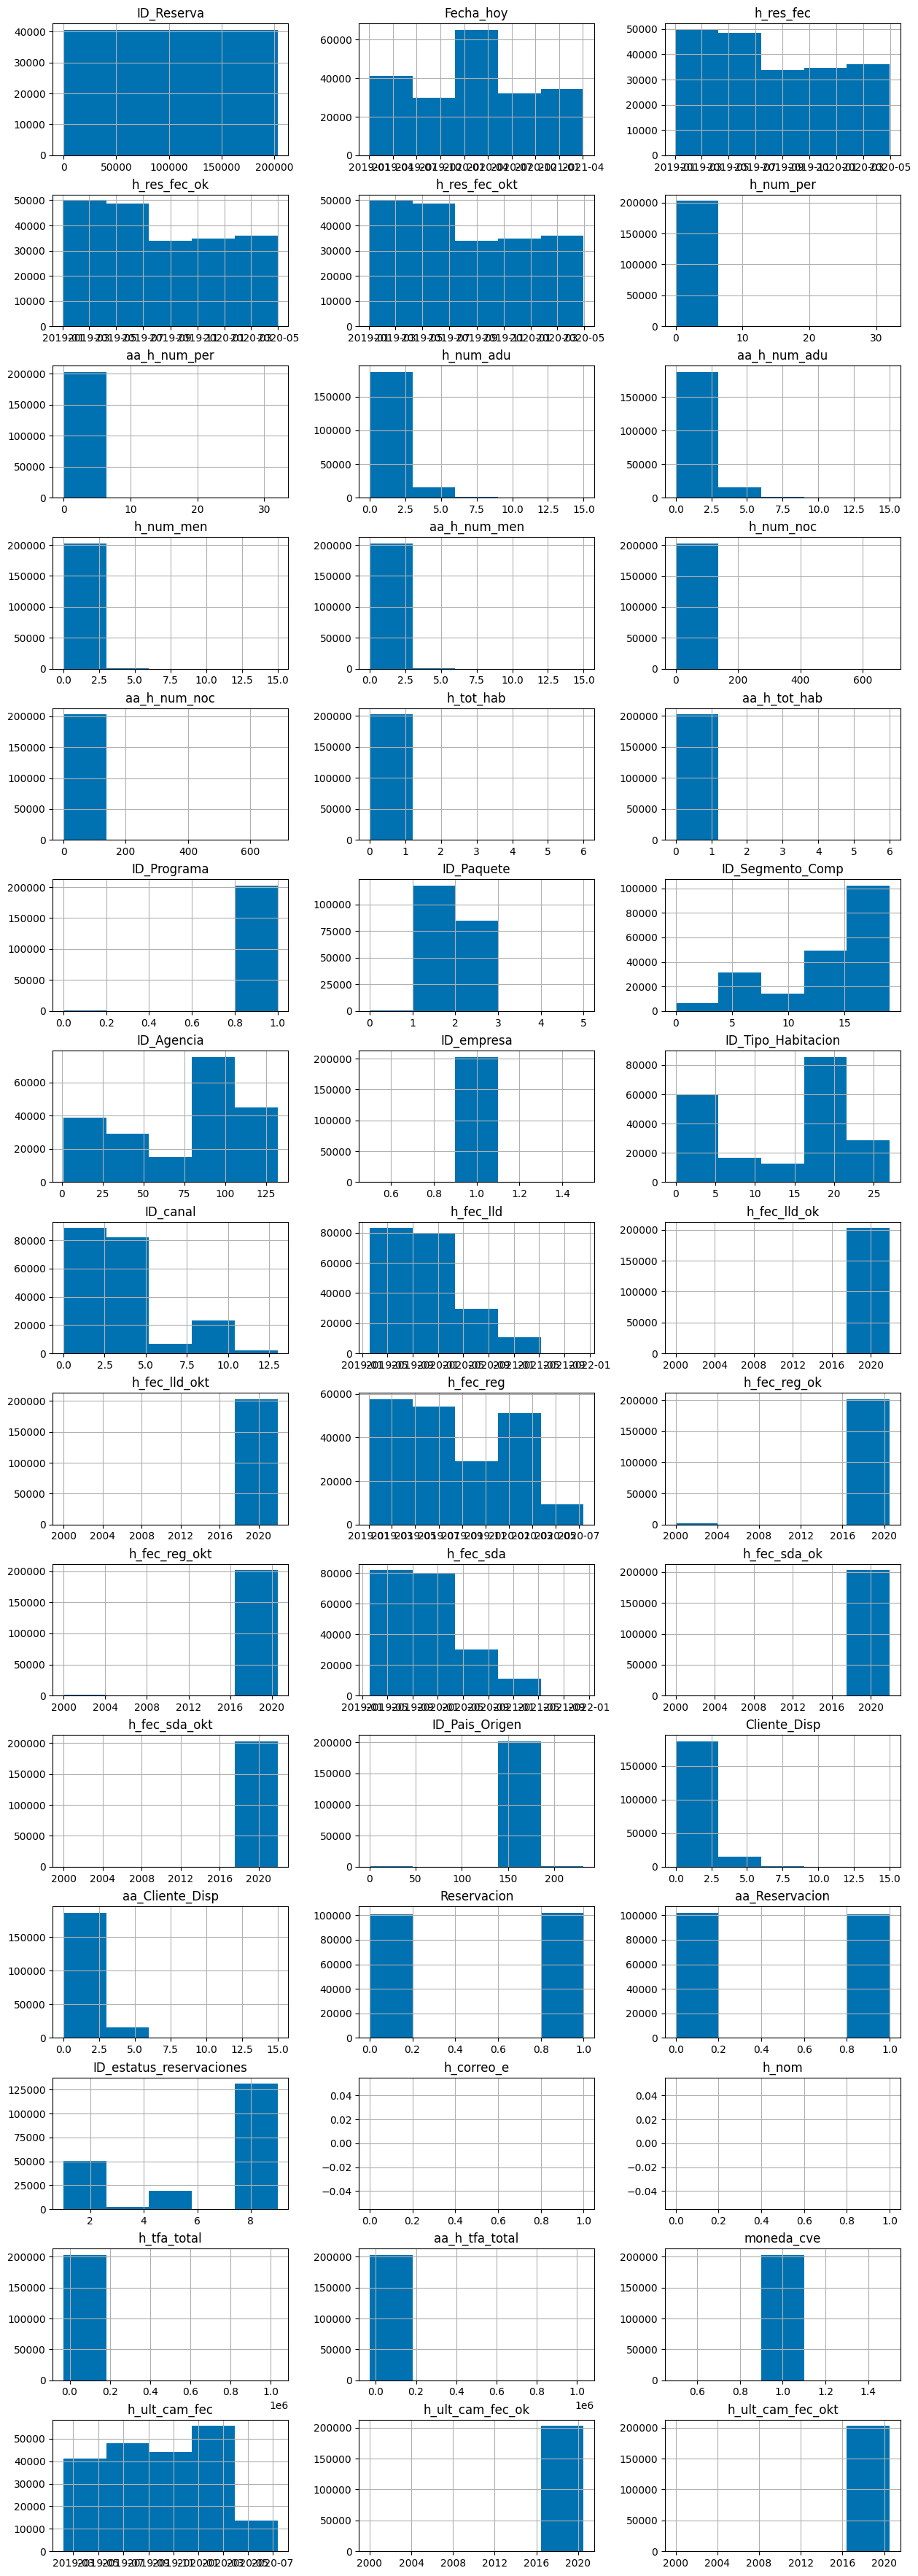

In [11]:
plt.style.use('seaborn-v0_8-colorblind')
df.hist(figsize=(15,45),histtype='stepfilled',layout=(15,3),bins=5)

## Identificacipon de Valores Nulos `Null`

In [15]:
# Verificar valores nulos 
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

h_fec_lld           2
h_fec_reg        1550
h_fec_sda          34
h_ult_cam_fec     533
dtype: int64


In [16]:
# Eliminar columnas con valores nulos
df = df.drop(columns=['h_correo_e', 'h_nom'])

KeyError: "['h_correo_e', 'h_nom'] not found in axis"

In [25]:
# Eliminar filas con valores nulos
df = df.dropna()

In [26]:
# Total de valores faltantes
print(df.isnull().sum().sum())  

0


Reemplazamos los campos vacíos (con solo espacios) por valores nulos para mayor control

In [27]:
# Convertir valores con espacios en blanco en NaN
df = df.replace(r'^\s*$', pd.NA, regex=True)

In [28]:
# Nuevos valores nulos
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

Series([], dtype: int64)


## Identificación de Filas Duplicadas

In [20]:
# Verificar y eliminar filas duplicadas
duplicados = df.duplicated()
print(f"\nNúmero de filas duplicadas: {duplicados.sum()}")
df = df.drop_duplicates()


Número de filas duplicadas: 0


In [21]:
# Nuevas dimensiones del dataset
df.shape

(203002, 47)

## Identificación de `Outliers`

<Axes: xlabel='h_num_per', ylabel='h_tfa_total'>

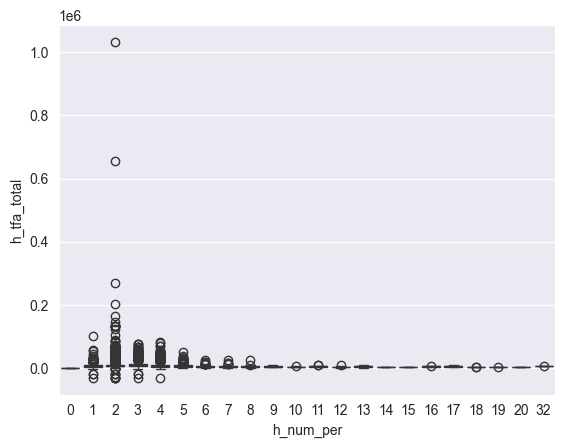

In [22]:
sns.set_style("darkgrid") 
sns.boxplot(x = 'h_num_per', y = 'h_tfa_total', data = df)

<Figure size 500x300 with 0 Axes>

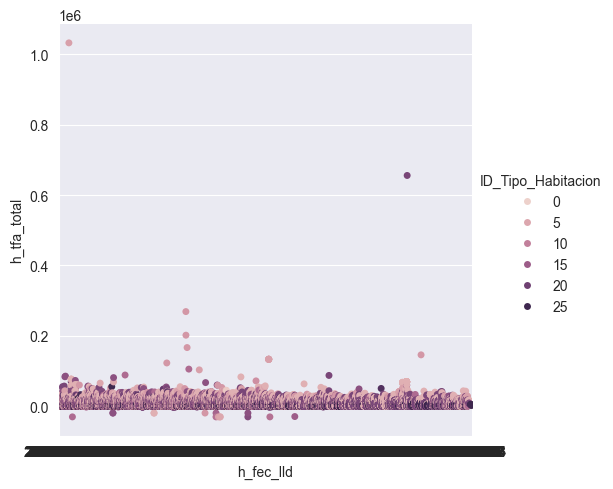

In [23]:
plt.figure(figsize=(5, 3))
sns.catplot(data=df, x='h_fec_lld', y='h_tfa_total', hue = 'ID_Tipo_Habitacion')

## Pandas Data Profiling 
Aplicamos nuevamente esta herramienta después de realizar el análisis

In [ ]:
profile_report = ProfileReport(df, title="Profiling Report Clean")
profile_report.to_file("Profile_report_clean.html")